# LSTM mnist

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

import matplotlib.pyplot as plt


In [3]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train/255.
X_test = X_test/255.

In [6]:
def build_model():
  model = Sequential([
      layers.LSTM(32,input_shape=(28,28), activation='relu', return_sequences=True),
      layers.Dropout(0.2),
      layers.LSTM(32, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(16, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
  return model

In [8]:
model=build_model()

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # sparse_categorical_crossentropy : sparse 쓰는 이유는 원핫인코딩을 안했기 때문..
              metrics=['acc'])


In [12]:
history = model.fit(X_train,y_train,epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 20s 26ms/step - loss: 0.2256 - acc: 0.9355 - val_loss: 0.1618 - val_acc: 0.9515
Epoch 2/30
750/750 [==============================] - 19s 25ms/step - loss: 0.1855 - acc: 0.9466 - val_loss: 0.1237 - val_acc: 0.9657
Epoch 3/30
750/750 [==============================] - 18s 24ms/step - loss: 0.1611 - acc: 0.9549 - val_loss: 0.1131 - val_acc: 0.9688
Epoch 4/30
750/750 [==============================] - 18s 24ms/step - loss: 0.1387 - acc: 0.9611 - val_loss: 0.1002 - val_acc: 0.9708
Epoch 5/30
750/750 [==============================] - 18s 24ms/step - loss: 0.1264 - acc: 0.9642 - val_loss: 0.1144 - val_acc: 0.9670
Epoch 6/30
750/750 [==============================] - 18s 24ms/step - loss: 0.1172 - acc: 0.9670 - val_loss: 0.0887 - val_acc: 0.9755
Epoch 7/30
750/750 [==============================] - 18s 24ms/step - loss: 0.1058 - acc: 0.9701 - val_loss: 0.0856 - val_acc: 0.9769
Epoch 8/30
750/750 [==============================] - 19s 25ms

In [13]:
# 결과 시각화 함수

def plot_history(history):
  hist = history.history
  plt.figure(figsize=(8,5))
  plt.subplot(1,2,1)
  plt.plot(history.epoch, hist['loss'], label="loss")
  plt.plot(history.epoch, hist['val_loss'], label='val_loss')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(history.epoch, hist['acc'], label="acc")
  plt.plot(history.epoch, hist['val_acc'], label='val_acc')
  plt.legend()
  plt.show()

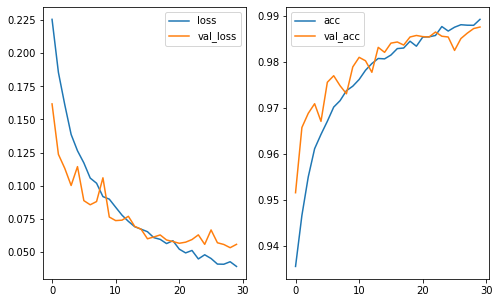

In [16]:
plot_history(history)

In [17]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0556 - acc: 0.9856


[0.05559663102030754, 0.9855999946594238]